In [1]:
import pandas as pd
import numpy as np
import operator as op
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
yr1950 = pd.read_csv("1950.csv")
yr1960 = pd.read_csv("1960.csv")
yr1970 = pd.read_csv("1970.csv")
yr1980 = pd.read_csv("1980.csv")
yr1990 = pd.read_csv("1990.csv")
yr2000 = pd.read_csv("2000.csv")
yr2010 = pd.read_csv("2010.csv")

cl1950 = pd.DataFrame()
cl1960 = pd.DataFrame()
cl1970 = pd.DataFrame()
cl1980 = pd.DataFrame()
cl1990 = pd.DataFrame()
cl2000 = pd.DataFrame()
cl2010 = pd.DataFrame()

decades = [yr1950, yr1960, yr1970, yr1980, yr1990, yr2000, yr2010]
clean_decades = [cl1950, cl1960, cl1970, cl1980, cl1990, cl2000, cl2010]

index = 0

for i in decades:
    
    artists = []
    [artists.append(x) for x in i['artist'] if x not in artists]
    avg_num = []
    avg_bpm = []
    avg_nrgy = []
    avg_dnce = []
    avg_dB = []
    avg_live = []
    avg_val = []
    avg_dur = []
    avg_acous = []
    avg_spch = []
    avg_pop = []
    num_songs = []
    
    temp = []
    
    for j in artists: 
        empty_storage = (i.where(j == i['artist']).dropna())
        
        artist_data = np.array([j, round(empty_storage['bpm'].mean(), 2), round(empty_storage['nrgy'].mean(), 2), round(empty_storage['dnce'].mean(), 2),
                               round(empty_storage['dB'].mean(), 2), round(empty_storage['live'].mean(), 2), round(empty_storage['val'].mean(), 2), round(empty_storage['dur'].mean(), 2), 
                               round(empty_storage['acous'].mean(), 2), round(empty_storage['spch'].mean(), 2), round(empty_storage['pop'].mean(), 2)])
        
        valid = True
        for k in range(len(artist_data)):
            if artist_data[k] == 'nan':
                valid = False
                break
            else:    
                valid = True
                
        if (valid == True):
            temp.append(artist_data)
            num_songs.append(op.countOf(i['artist'], j))
        
    clean_decades[index] = pd.DataFrame(temp, columns = ['artist', 'bpm', 'energy', 'dance', 'dB', 'live', 'val', 'time', 'acous', 'spch', 'pop'])
    clean_decades[index]['quant'] = num_songs
    clean_decades[index].fillna(value = 'nan')

    index+=1

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

features = ['bpm','energy','live']


X = clean_decades[0][features]
Y = clean_decades[0]['pop']
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier = classifier.fit(X, Y)

In [4]:
knn_predictions = []
for i in clean_decades:
    knn_df = pd.DataFrame()
    knn_df['artist'] = i['artist']
    knn_df['popularity'] = classifier.predict(i[features])
    knn_df = knn_df.sort_values(by = ['popularity'], ascending=False)
    knn_predictions.append(knn_df['artist'].head(10))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import graphviz

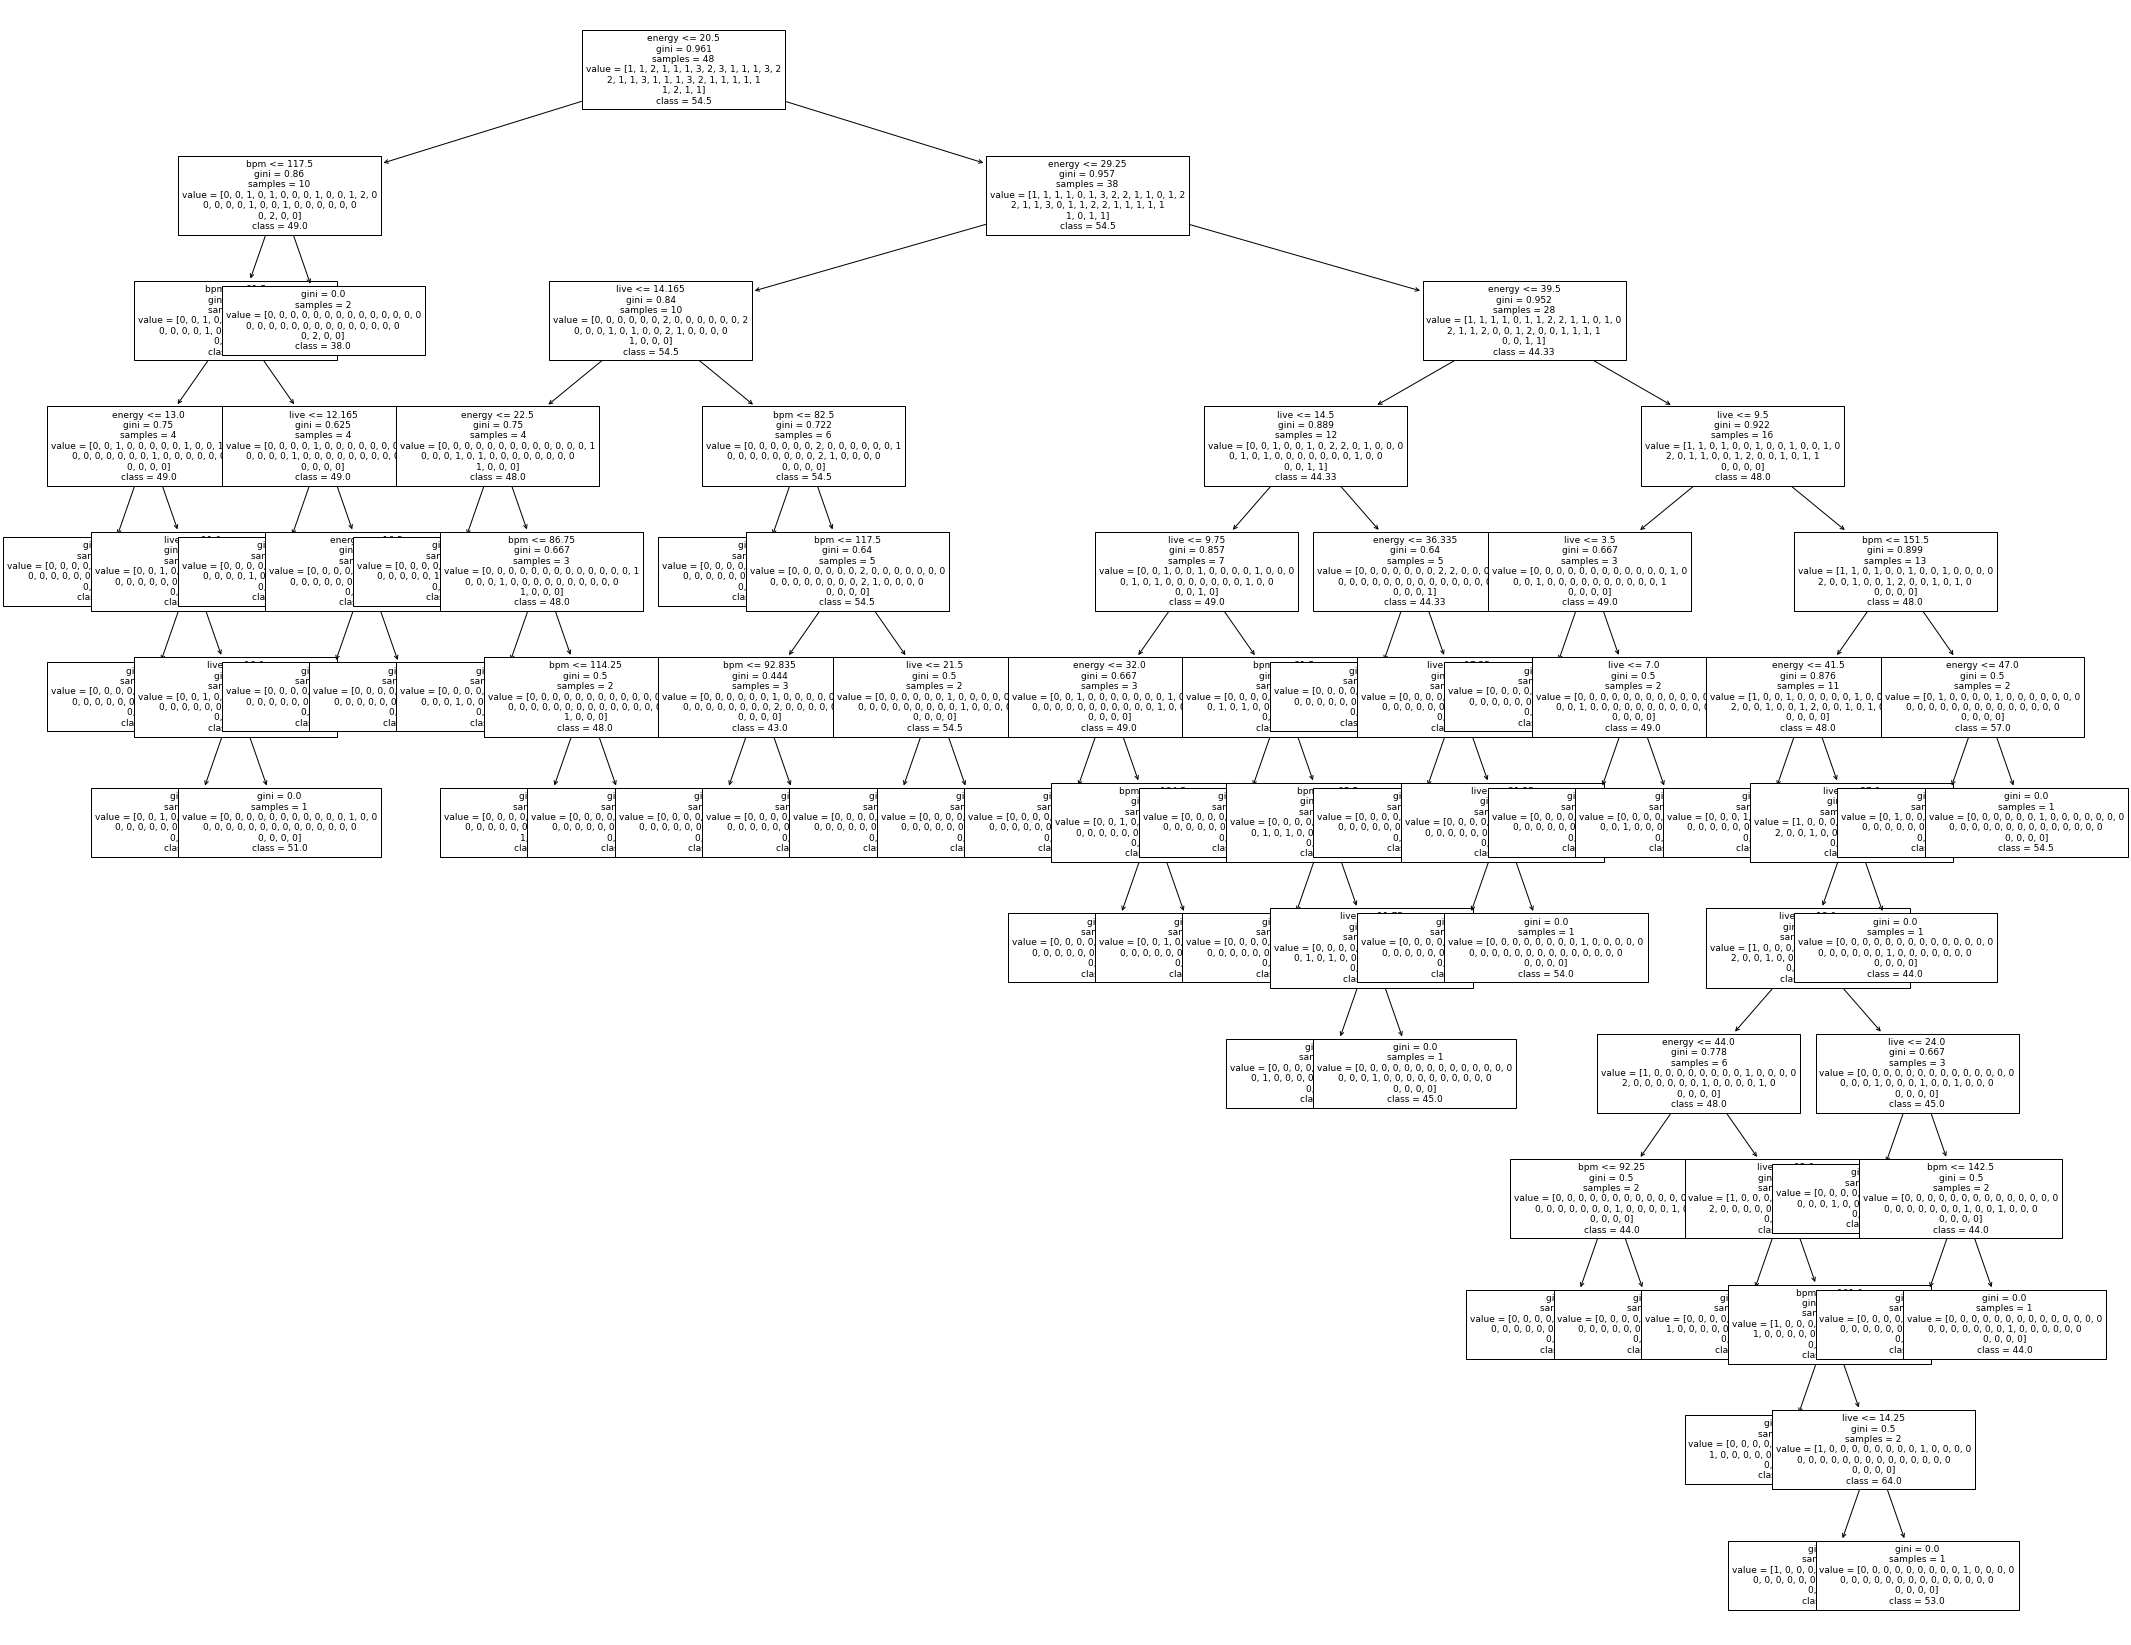

In [6]:
holder = []

X = clean_decades[0][features]
Y = clean_decades[0]['pop']

dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X,Y)

plt.figure(figsize=(36,30))
tree.plot_tree(dtc, fontsize=9, feature_names = features, class_names = clean_decades[0]['pop'])
plt.savefig('tree_high_dpi', dpi=100)

In [7]:
dtc_predictions = []
for i in clean_decades:
    temp_df = pd.DataFrame()
    temp_df['artist'] = i['artist']
    temp_df['popularity'] = dtc.predict(i[features])
    temp_df = temp_df.sort_values(by = ['popularity'], ascending=False)
    dtc_predictions.append(temp_df['artist'].head(10))

In [8]:
from tensorflow import keras
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import *
import random
from sklearn.feature_extraction.text import HashingVectorizer

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [9]:
X = clean_decades[0][features]
Y = clean_decades[0]['pop']

X = np.asarray(X).astype(np.float32)

model = MLPClassifier(solver='adam', max_iter = 10000, alpha=1e-5)

nn = model.fit(X, Y)

In [10]:
nn_predictions = []
for i in clean_decades:
    holder_df = pd.DataFrame()
    holder_df['artist'] = i['artist']
    i[features] = np.asarray(i[features]).astype(np.float32)
    holder_df['popularity'] = model.predict(i[features])
    holder_df = holder_df.sort_values(by = ['popularity'], ascending=False)
    nn_predictions.append(holder_df['artist'].head(10))

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
X = clean_decades[0][features]
Y = clean_decades[0]['pop']

rfc = RandomForestClassifier(n_estimators = 200, max_depth=None)
rfc = rfc.fit(X,Y)

In [13]:
rfc_predictions = []
for i in clean_decades:
    group_df = pd.DataFrame()
    group_df['artist'] = i['artist']
    i[features] = np.asarray(i[features]).astype(np.float32)
    group_df['popularity'] = rfc.predict(i[features])
    group_df = group_df.sort_values(by = ['popularity'], ascending=False)
    rfc_predictions.append(group_df['artist'].head(10))

In [14]:
rankings = pd.read_csv("rankings.csv")

decades = ['50s', '60s', '70s', '80s', '90s', '00s', '10s']

knn_accuracies = []
dtc_accuracies = []
rfc_accuracies = []
nn_accuracies = []

for i in range(len(decades)): 
    knn_counter = 0
    dtc_counter = 0
    rfc_counter = 0
    nn_counter = 0
    
    for j in rankings[decades[i]]:
        
        if (j in list(knn_predictions[i])):
            knn_counter+=1
            
        if (j in list(dtc_predictions[i])):
            dtc_counter+=1
    
        if (j in list(rfc_predictions[i])):
            rfc_counter+=1
            
        if (j in list(nn_predictions[i])):
            nn_counter+=1 
    
    knn_accuracies.append(knn_counter/10)
    dtc_accuracies.append(dtc_counter/10)
    rfc_accuracies.append(rfc_counter/10)
    nn_accuracies.append(nn_counter/10)

In [15]:
contrast = []
for i in range(7):
    analysis = pd.concat([nn_predictions[i], rfc_predictions[i], dtc_predictions[i], knn_predictions[i]], keys=['artist', 'artist','artist','artist'], axis=1)
    contrast.append(10 / analysis.shape[0])
    
analysis

,artist,artist,artist,artist
0,NaN,NaN,Billie Eilish,NaN
4,NaN,NaN,NaN,Post Malone
5,NaN,XXXTENTACION,NaN,XXXTENTACION
17,NaN,Martin Garrix,Martin Garrix,Martin Garrix
19,NaN,NaN,gnash,gnash
23,Clean Bandit,NaN,Clean Bandit,NaN
28,Pitbull,Pitbull,NaN,Pitbull
32,Maroon 5,NaN,Maroon 5,NaN
33,ZAYN,NaN,NaN,NaN
38,Joel Adams,NaN,Joel Adams,NaN


([<matplotlib.axis.XTick at 0x29368d66610>,
 [Text(0, 0, '50s'),
  Text(1, 0, '60s'),
  Text(2, 0, '70s'),
  Text(3, 0, '80s'),
  Text(4, 0, '90s'),
  Text(5, 0, '00s'),
  Text(6, 0, '10s')])

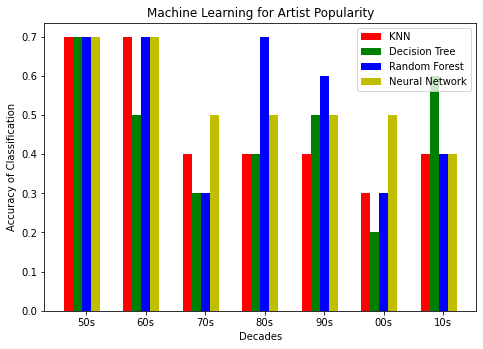

In [16]:
import numpy as np
import matplotlib.pyplot as plt
x_values = np.arange(7)
barPlot = plt.figure()
plot = barPlot.add_axes([0,0,1,1])

knn_bar = plot.bar(x_values - 0.3, knn_accuracies, color = 'r', width = 0.15)
dtc_bar = plot.bar(x_values - 0.15, dtc_accuracies, color = 'g', width = 0.15)
rfc_bar = plot.bar(x_values - 0.0, rfc_accuracies, color = 'b', width = 0.15)
nn_bar = plot.bar(x_values + 0.15, nn_accuracies, color = 'y', width = 0.15)

plt.xlabel("Decades")
plt.ylabel("Accuracy of Classification")
plt.title("Machine Learning for Artist Popularity")
plt.legend([knn_bar,dtc_bar,rfc_bar,nn_bar], ['KNN', 'Decision Tree', 'Random Forest', 'Neural Network'])
plt.xticks(x_values, decades)

In [17]:
knn_final = sum(knn_accuracies) / len(knn_accuracies)
dtc_final = sum(dtc_accuracies) / len(dtc_accuracies)
rfc_final = sum(rfc_accuracies) / len(rfc_accuracies)
nn_final = sum(nn_accuracies) / len(nn_accuracies)

accuracy = [knn_final, dtc_final, rfc_final, nn_final]
final_df = pd.DataFrame()
final_df['Classifier'] = ['KNN', 'Decision Tree', 'Random Forest', 'Neural Network']
final_df['Accuracies'] = accuracy

final_df

,Classifier,Accuracies
0,KNN,0.471429
1,Decision Tree,0.457143
2,Random Forest,0.528571
3,Neural Network,0.542857


([<matplotlib.axis.XTick at 0x29368e28430>,
 [Text(0, 0, '50s'),
  Text(1, 0, '60s'),
  Text(2, 0, '70s'),
  Text(3, 0, '80s'),
  Text(4, 0, '90s'),
  Text(5, 0, '00s'),
  Text(6, 0, '10s')])

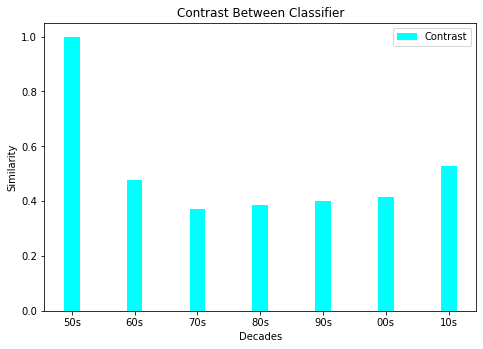

In [18]:
barPlot = plt.figure()
plot = barPlot.add_axes([0,0,1,1])
con_bar = plot.bar(x_values, contrast, color = 'cyan', width = 0.25)

plt.xlabel("Decades")
plt.ylabel("Similarity")
plt.title("Contrast Between Classifier")
plt.legend([con_bar], ['Contrast'])
plt.xticks(x_values, decades)

In [19]:
con_df = pd.DataFrame()
con_df['Decade'] = decades
con_df['Contrast'] = contrast
con_df

,Decade,Contrast
0,50s,1.000000
1,60s,0.476190
2,70s,0.370370
3,80s,0.384615
4,90s,0.400000
5,00s,0.416667
6,10s,0.526316
